In [72]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.datasets import fashion_mnist
#rom tensorflow.keras.los

from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [73]:
tf.__version__

'2.2.0'

In [74]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

In [75]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [76]:
# Labels 
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 - T-shirt/top
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandal
6 - Shirt
7 - Sneaker
8 - Bag
9 - Ankle boot
'''
print(len(labels))

10


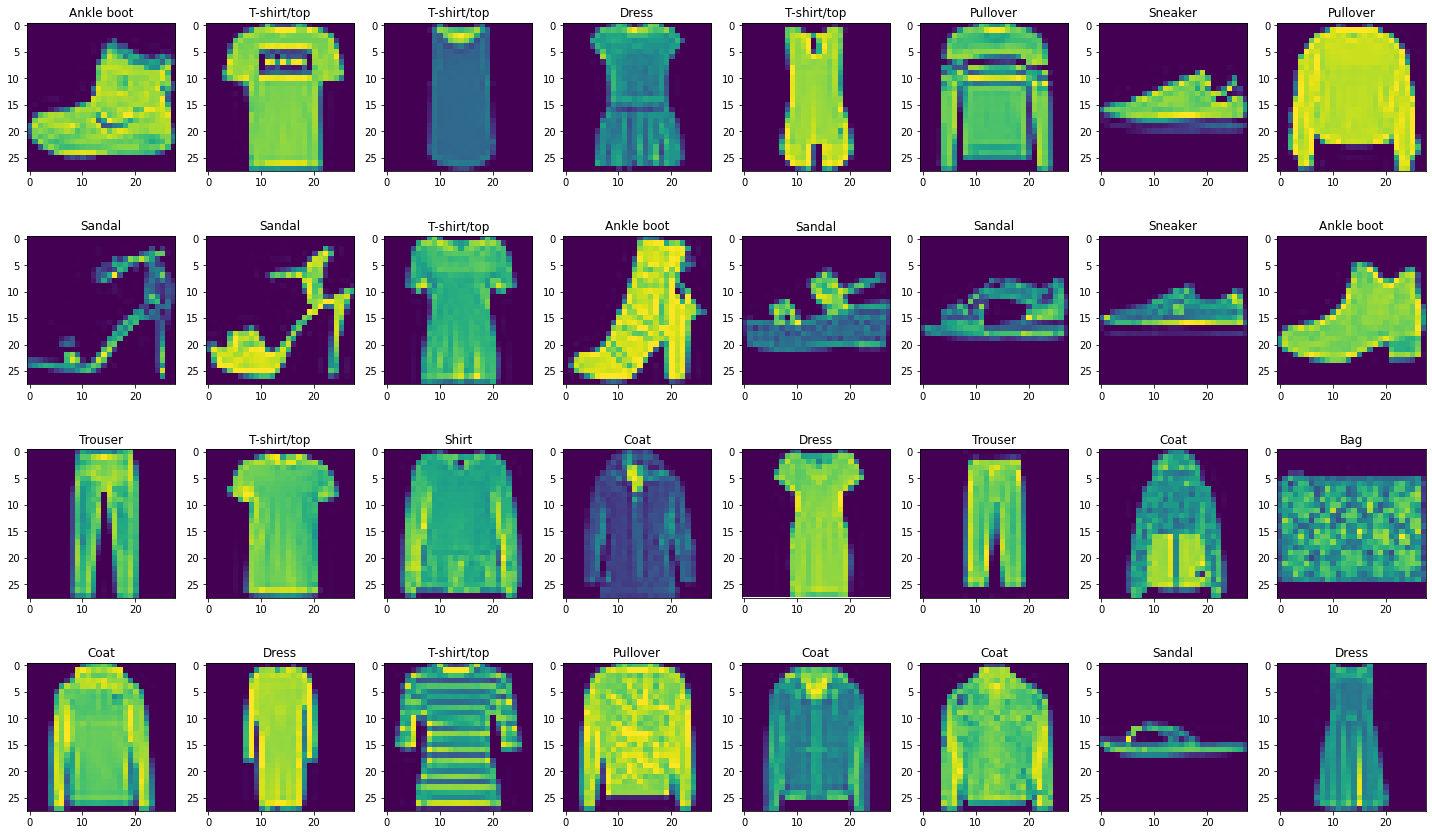

In [77]:
# Visualize MNIST dataset 
num_row = 4
num_col = 8
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,3*num_row))
for i in range(32):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i])#, cmap='gray')
    ax.set_title('{0}'.format(labels[Y_train[i]]))
plt.tight_layout()
plt.show()

In [78]:
def build_model(n=2,hldim=[300,100],hlactfun=['relu','relu'],optmzr='sgd'):
    '''
    parameters  : 
        n : total number of hidden layer 
        hldim = [HiddenLayer1 Neurons , HiddenLayer2 Neurons ]
        hlactfun = [HL1 activation function , HL2 activation function]
    '''
    # Model creation 
    model = Sequential()

    model.add(Flatten(input_shape=[28,28]))
    for i in range(n):
        model.add(Dense(hldim[i],activation=hlactfun[i]))
    #model.add(Dense(hldim[1],activation=hlactfun[1]))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',optimizer=optmzr,metrics=['accuracy'])
    return model

In [79]:
# Now we can build the model 
model1= build_model()
history1 = model1.fit(X_train,Y_train,epochs=100,validation_data = (X_test,Y_test))

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 21222518035774948985094012928.0000 - accuracy: 0.0981 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/st

Epoch 55/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 56/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 57/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 58/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 59/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 60/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 5401494.5000 - val_accuracy: 0.1000
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - a

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


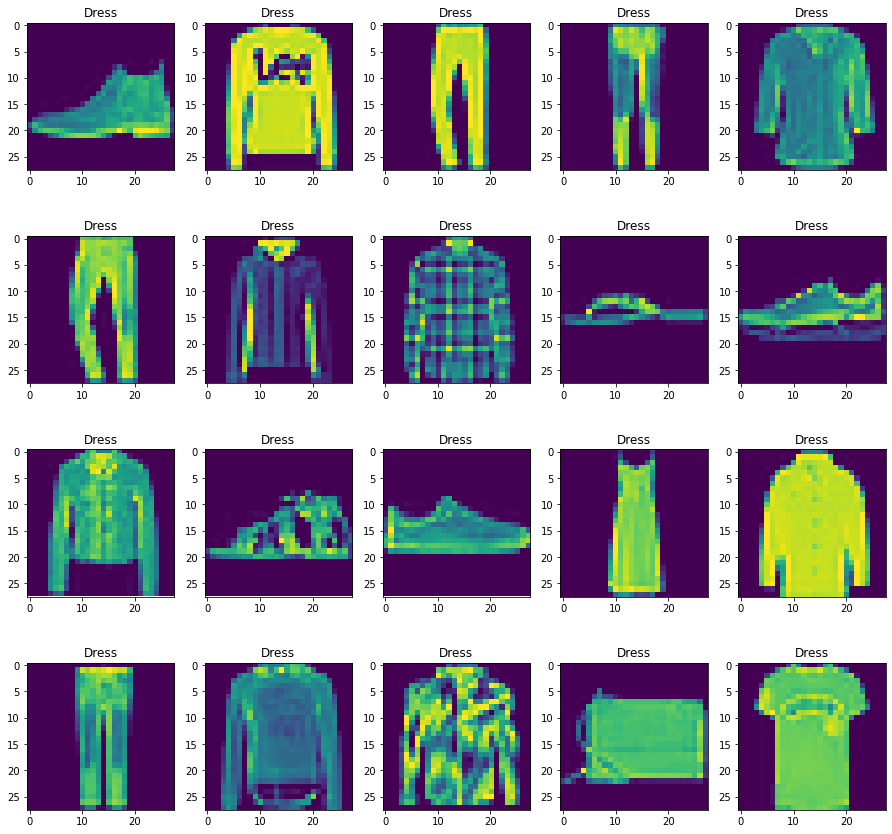

In [80]:
prediction1 = model1.predict_classes(X_test[:20])
print(prediction1)
#print([labels[i] for i in prediction1])

# We can check the predictin by vizualizing them using matplotlib 
num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,3*num_row))
for i in range(20):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test[i])#, cmap='gray')
    ax.set_title('{0}'.format(labels[prediction1[i]]))
plt.tight_layout()
plt.show()

In [81]:
# Actual prediction 
print(Y_test[:20])
print([labels[i] for i in Y_test[:20]])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sneaker', 'Dress', 'Coat', 'Trouser', 'Pullover', 'Coat', 'Bag', 'T-shirt/top']


In [82]:
# Normalize the dataset 
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0 

In [83]:
model2 = build_model()

In [84]:
history2 = model2.fit(X_train_norm,Y_train,epochs=100,validation_data=(X_test_norm,Y_test))

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7038 - accuracy: 0.7630 - val_loss: 0.5719 - val_accuracy: 0.7991
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4821 - accuracy: 0.8317 - val_loss: 0.4772 - val_accuracy: 0.8310
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4366 - accuracy: 0.8482 - val_loss: 0.4518 - val_accuracy: 0.8395
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4101 - accuracy: 0.8567 - val_loss: 0.4323 - val_accuracy: 0.8481
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3903 - accuracy: 0.8637 - val_loss: 0.4129 - val_accuracy: 0.8537
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3752 - accuracy: 0.8684 - val_loss: 0.4030 - val_accuracy: 0.8579
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3615 - accuracy: 0.8713 - val_loss: 0.3860 - val_ac

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1413 - accuracy: 0.9495 - val_loss: 0.3284 - val_accuracy: 0.8917
Epoch 58/100
1875/1875 [==============================] - 2s 999us/step - loss: 0.1391 - accuracy: 0.9511 - val_loss: 0.3318 - val_accuracy: 0.8881
Epoch 59/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1375 - accuracy: 0.9509 - val_loss: 0.3309 - val_accuracy: 0.8897
Epoch 60/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1361 - accuracy: 0.9513 - val_loss: 0.3393 - val_accuracy: 0.8891
Epoch 61/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1330 - accuracy: 0.9530 - val_loss: 0.3275 - val_accuracy: 0.8930
Epoch 62/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1293 - accuracy: 0.9551 - val_loss: 0.3387 - val_accuracy: 0.8881
Epoch 63/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1294 - accuracy: 0.9543 - val_loss: 0.3242 - val_accura

In [85]:
prediction2 = model2.predict_classes(X_test[:20])
print(prediction2)
print([labels[i] for i in prediction2])

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal', 'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag', 'T-shirt/top']


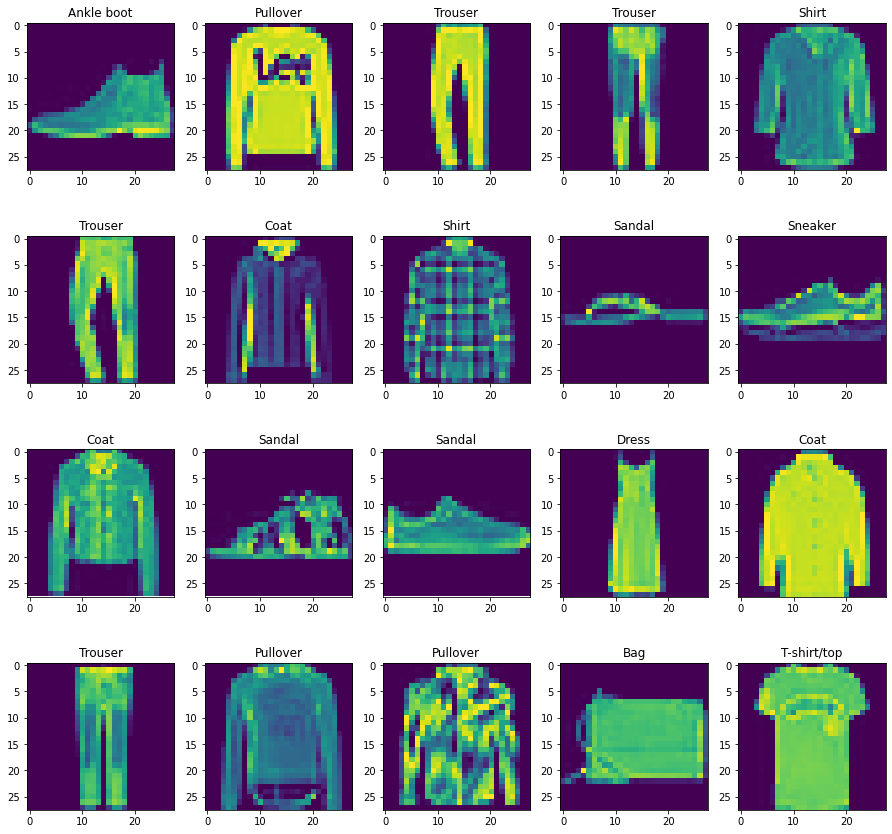

In [86]:
# We can check the predictin by vizualizing them using matplotlib 
num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,3*num_row))
for i in range(20):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test[i])#, cmap='gray')
    ax.set_title('{0}'.format(labels[prediction2[i]]))
plt.tight_layout()
plt.show()

In [87]:
# Also plot 2 histories of model that we trained 
# with normalized data and without normalized data 

model3 = build_model()
history3 = model3.fit(X_train_norm,Y_train,epochs=100,batch_size=20,validation_split=.1,validation_data=(X_test_norm,Y_test))

Epoch 1/100
2700/2700 [==============================] - 3s 1ms/step - loss: 0.6544 - accuracy: 0.7796 - val_loss: 0.4753 - val_accuracy: 0.8290
Epoch 2/100
2700/2700 [==============================] - 3s 967us/step - loss: 0.4564 - accuracy: 0.8394 - val_loss: 0.4196 - val_accuracy: 0.8497
Epoch 3/100
2700/2700 [==============================] - 5s 2ms/step - loss: 0.4124 - accuracy: 0.8563 - val_loss: 0.4054 - val_accuracy: 0.8572
Epoch 4/100
2700/2700 [==============================] - 3s 961us/step - loss: 0.3861 - accuracy: 0.8648 - val_loss: 0.4178 - val_accuracy: 0.8503
Epoch 5/100
2700/2700 [==============================] - 3s 1ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3691 - val_accuracy: 0.8692
Epoch 6/100
2700/2700 [==============================] - 3s 959us/step - loss: 0.3481 - accuracy: 0.8763 - val_loss: 0.3548 - val_accuracy: 0.8690
Epoch 7/100
2700/2700 [==============================] - 3s 980us/step - loss: 0.3354 - accuracy: 0.8792 - val_loss: 0.3555 

Epoch 57/100
2700/2700 [==============================] - 3s 936us/step - loss: 0.1049 - accuracy: 0.9627 - val_loss: 0.3632 - val_accuracy: 0.8883
Epoch 58/100
2700/2700 [==============================] - 4s 1ms/step - loss: 0.1037 - accuracy: 0.9633 - val_loss: 0.3496 - val_accuracy: 0.8927
Epoch 59/100
2700/2700 [==============================] - 3s 1ms/step - loss: 0.0992 - accuracy: 0.9658 - val_loss: 0.3769 - val_accuracy: 0.8857
Epoch 60/100
2700/2700 [==============================] - 3s 966us/step - loss: 0.0994 - accuracy: 0.9652 - val_loss: 0.3809 - val_accuracy: 0.8873
Epoch 61/100
2700/2700 [==============================] - 3s 968us/step - loss: 0.0985 - accuracy: 0.9641 - val_loss: 0.3684 - val_accuracy: 0.8917
Epoch 62/100
2700/2700 [==============================] - 3s 968us/step - loss: 0.0930 - accuracy: 0.9675 - val_loss: 0.3613 - val_accuracy: 0.8963
Epoch 63/100
2700/2700 [==============================] - 3s 947us/step - loss: 0.0914 - accuracy: 0.9680 - val_loss

In [88]:
prediction3 = model3.predict_classes(X_test[:20])
print(prediction3)
print([labels[i] for i in prediction3])

[9 2 1 1 6 1 4 6 5 7 4 5 8 3 4 1 2 2 8 0]
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Bag', 'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag', 'T-shirt/top']


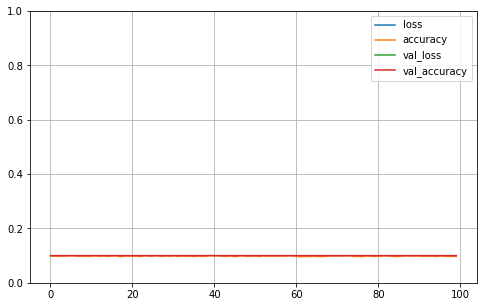

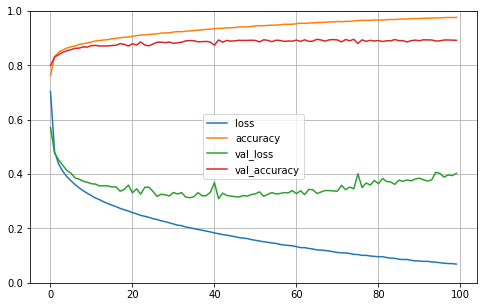

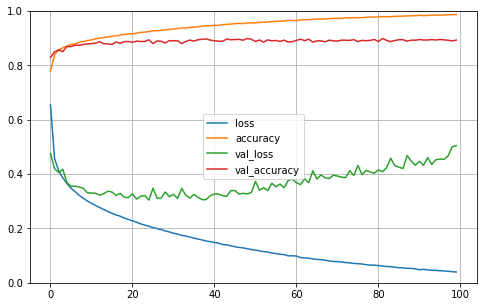

In [89]:
# Now we can plot the history of 3 trainings 
# first model training history - without normalized data 
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# normalized data with optimiizer as sgd 
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# normalized data with optimizer : adam and batch size 10 
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [94]:
## Now we change the no. of hidden layer 

# Create a model with 4 Hidden Layer 
# HL1 - 100 neurons , HL2 - 100 neurons , HL2 - 100 neurons and HL4 - 50 neurons , and all layer
# All four HL has relu activation 
# optimizer : adam 
model1 = build_model(n=4,hldim=[300,300,300,100],hlactfun=['relu','relu','relu','relu'],optmzr='adam')
model1.summary()
history1 = model1.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model1_eval = model1.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model1_eval)
##############################################
# Now we can create a model with 3 HL 
# HL1 - 100 , HL2 - 100 , HL3 - 50
model2 = build_model(n=3,hldim=[300,300,100],hlactfun=['relu','relu','relu'],optmzr='adam')
model2.summary()
history2 = model2.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model2_eval = model2.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model2_eval)
##############################################
# Now we can create a model with 2  HL 
# HL1 - 100 , HL2 - 50
model3 = build_model(n=2,hldim=[300,100],hlactfun=['relu','relu'],optmzr='adam')
model3.summary()
history3 = model3.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model3_eval = model3.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model3_eval)
##############################################
# Now we can create a model with 1  HL 
# HL1 - 100 , HL2 - 50
model4 = build_model(n=1,hldim=[300],hlactfun=['relu'],optmzr='adam')
model4.summary()
history4 = model4.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model4_eval = model4.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model4_eval)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_57 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_58 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_59 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1010      
Total params: 447,210
Trainable params: 447,210
Non-trainable params: 0
_______________________________________________

Epoch 49/100
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2872 - accuracy: 0.9191 - val_loss: 1.0129 - val_accuracy: 0.8784
Epoch 50/100
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2801 - accuracy: 0.9214 - val_loss: 1.3786 - val_accuracy: 0.8826
Epoch 51/100
9600/9600 [==============================] - 28s 3ms/step - loss: 0.2369 - accuracy: 0.9249 - val_loss: 1.9952 - val_accuracy: 0.8824
Epoch 52/100
9600/9600 [==============================] - 28s 3ms/step - loss: 0.2555 - accuracy: 0.9227 - val_loss: 2.0800 - val_accuracy: 0.8826
Epoch 53/100
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2290 - accuracy: 0.9250 - val_loss: 2.1639 - val_accuracy: 0.8817
Epoch 54/100
9600/9600 [==============================] - 28s 3ms/step - loss: 0.2998 - accuracy: 0.9200 - val_loss: 1.6621 - val_accuracy: 0.8851
Epoch 55/100
9600/9600 [==============================] - 28s 3ms/step - loss: 0.2312 - accuracy: 0.9263 - val_loss: 2

Epoch 1/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.5147 - accuracy: 0.8145 - val_loss: 0.4721 - val_accuracy: 0.8320
Epoch 2/100
9600/9600 [==============================] - 24s 3ms/step - loss: 0.3975 - accuracy: 0.8553 - val_loss: 0.4241 - val_accuracy: 0.8474
Epoch 3/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.3621 - accuracy: 0.8692 - val_loss: 0.3820 - val_accuracy: 0.8642
Epoch 4/100
9600/9600 [==============================] - 23s 2ms/step - loss: 0.3414 - accuracy: 0.8763 - val_loss: 0.3929 - val_accuracy: 0.8640
Epoch 5/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.3281 - accuracy: 0.8816 - val_loss: 0.3839 - val_accuracy: 0.8712
Epoch 6/100
9600/9600 [==============================] - 23s 2ms/step - loss: 0.3231 - accuracy: 0.8851 - val_loss: 0.4459 - val_accuracy: 0.8524
Epoch 7/100
9600/9600 [==============================] - 21s 2ms/step - loss: 0.3091 - accuracy: 0.8879 - val_loss: 0.3678 -

Epoch 57/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.2024 - accuracy: 0.9308 - val_loss: 1.5177 - val_accuracy: 0.8628
Epoch 58/100
9600/9600 [==============================] - 23s 2ms/step - loss: 0.2163 - accuracy: 0.9260 - val_loss: 1.1089 - val_accuracy: 0.8902
Epoch 59/100
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2107 - accuracy: 0.9289 - val_loss: 1.2477 - val_accuracy: 0.8838
Epoch 60/100
9600/9600 [==============================] - 24s 2ms/step - loss: 0.2075 - accuracy: 0.9305 - val_loss: 1.5445 - val_accuracy: 0.8834
Epoch 61/100
9600/9600 [==============================] - 23s 2ms/step - loss: 0.2608 - accuracy: 0.9306 - val_loss: 1.3474 - val_accuracy: 0.8905
Epoch 62/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.1928 - accuracy: 0.9326 - val_loss: 1.5265 - val_accuracy: 0.8773
Epoch 63/100
9600/9600 [==============================] - 23s 2ms/step - loss: 0.2264 - accuracy: 0.9321 - val_loss: 1

Epoch 6/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.3022 - accuracy: 0.8897 - val_loss: 0.3752 - val_accuracy: 0.8757
Epoch 7/100
9600/9600 [==============================] - 16s 2ms/step - loss: 0.2896 - accuracy: 0.8925 - val_loss: 0.3378 - val_accuracy: 0.8850
Epoch 8/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.2790 - accuracy: 0.8961 - val_loss: 0.3573 - val_accuracy: 0.8789
Epoch 9/100
9600/9600 [==============================] - 18s 2ms/step - loss: 0.2731 - accuracy: 0.8997 - val_loss: 0.4227 - val_accuracy: 0.8715
Epoch 10/100
9600/9600 [==============================] - 18s 2ms/step - loss: 0.2665 - accuracy: 0.9010 - val_loss: 0.3401 - val_accuracy: 0.8867
Epoch 11/100
9600/9600 [==============================] - 22s 2ms/step - loss: 0.2620 - accuracy: 0.9019 - val_loss: 0.3711 - val_accuracy: 0.8859
Epoch 12/100
9600/9600 [==============================] - 19s 2ms/step - loss: 0.2559 - accuracy: 0.9053 - val_loss: 0.382

Epoch 62/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.1649 - accuracy: 0.9428 - val_loss: 0.9352 - val_accuracy: 0.8801
Epoch 63/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.1556 - accuracy: 0.9440 - val_loss: 1.0531 - val_accuracy: 0.8745
Epoch 64/100
9600/9600 [==============================] - 18s 2ms/step - loss: 0.1584 - accuracy: 0.9446 - val_loss: 0.9068 - val_accuracy: 0.8813
Epoch 65/100
9600/9600 [==============================] - 19s 2ms/step - loss: 0.1643 - accuracy: 0.9429 - val_loss: 0.9288 - val_accuracy: 0.8796
Epoch 66/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.1603 - accuracy: 0.9462 - val_loss: 1.0084 - val_accuracy: 0.8848
Epoch 67/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.1540 - accuracy: 0.9459 - val_loss: 1.1016 - val_accuracy: 0.8838
Epoch 68/100
9600/9600 [==============================] - 21s 2ms/step - loss: 0.1702 - accuracy: 0.9441 - val_loss: 1

9600/9600 [==============================] - 10s 1ms/step - loss: 0.2444 - accuracy: 0.9084 - val_loss: 0.3560 - val_accuracy: 0.8886
Epoch 12/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.2391 - accuracy: 0.9129 - val_loss: 0.3886 - val_accuracy: 0.8786
Epoch 13/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.2344 - accuracy: 0.9126 - val_loss: 0.3633 - val_accuracy: 0.8872
Epoch 14/100
9600/9600 [==============================] - 10s 1ms/step - loss: 0.2259 - accuracy: 0.9171 - val_loss: 0.3723 - val_accuracy: 0.8851
Epoch 15/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.2234 - accuracy: 0.9167 - val_loss: 0.4126 - val_accuracy: 0.8827
Epoch 16/100
9600/9600 [==============================] - 10s 1ms/step - loss: 0.2192 - accuracy: 0.9203 - val_loss: 0.4008 - val_accuracy: 0.8842
Epoch 17/100
9600/9600 [==============================] - 10s 1ms/step - loss: 0.2150 - accuracy: 0.9191 - val_loss: 0.3981 - val_a

Epoch 67/100
9600/9600 [==============================] - 9s 976us/step - loss: 0.1116 - accuracy: 0.9603 - val_loss: 0.8257 - val_accuracy: 0.8880
Epoch 68/100
9600/9600 [==============================] - 9s 975us/step - loss: 0.1141 - accuracy: 0.9593 - val_loss: 0.9007 - val_accuracy: 0.8866
Epoch 69/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1119 - accuracy: 0.9596 - val_loss: 0.9042 - val_accuracy: 0.8816
Epoch 70/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1149 - accuracy: 0.9596 - val_loss: 0.8959 - val_accuracy: 0.8823
Epoch 71/100
9600/9600 [==============================] - 10s 1ms/step - loss: 0.1101 - accuracy: 0.9602 - val_loss: 0.9208 - val_accuracy: 0.8846
Epoch 72/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1085 - accuracy: 0.9609 - val_loss: 0.9287 - val_accuracy: 0.8885
Epoch 73/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1117 - accuracy: 0.9604 - val_loss:

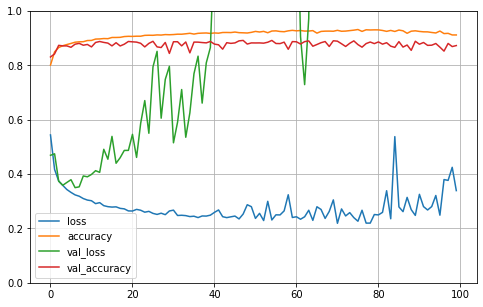

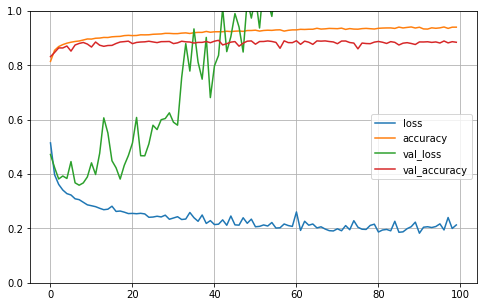

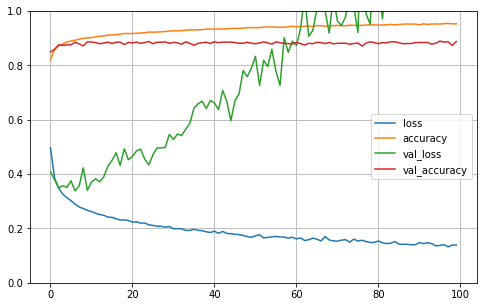

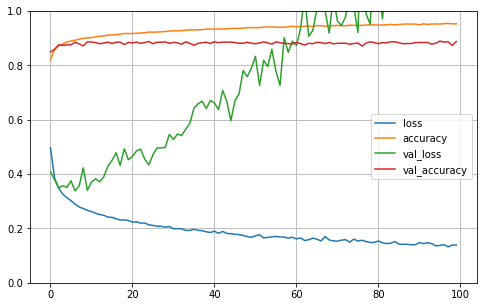

In [95]:
# 4 HL 
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# 3 HL 
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# 2 HL 
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
# 1 HL 
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [97]:
## Now we can change the no. of neurons in the hidden layer 

model1 = build_model(n=1,hldim=[300],hlactfun=['relu'],optmzr='adam')
model1.summary()
history1 = model1.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model1_eval = model1.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model1_eval)
##############################################
# Now we can create a model with 1 HL 
# HL1 -500
model2 = build_model(n=1,hldim=[500],hlactfun=['relu'],optmzr='adam')
model2.summary()
history2 = model2.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model2_eval = model2.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model2_eval)
##############################################
# Now we can create a model with 1  HL 
# HL1 - 800 neurons 
model3 = build_model(n=1,hldim=[800],hlactfun=['relu'],optmzr='adam')
model3.summary()
history3 = model3.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model3_eval = model3.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model3_eval)
##############################################
# Now we can create a model with 1  HL 
# HL1 1000 neurons 
model4 = build_model(n=1,hldim=[1000],hlactfun=['relu'],optmzr='adam')
model4.summary()
history4 = model4.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model4_eval = model4.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model4_eval)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_71 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.4872 - accuracy: 0.8244 - val_loss: 0.4095 - val_accuracy: 0.8501
Epoch 2/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.3747 - accuracy: 0.8611 - val_loss: 0.4113 - val_accuracy: 0.8562
Epoch 3/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.3374 

9600/9600 [==============================] - 11s 1ms/step - loss: 0.1331 - accuracy: 0.9526 - val_loss: 0.7304 - val_accuracy: 0.8844
Epoch 52/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1287 - accuracy: 0.9525 - val_loss: 0.7173 - val_accuracy: 0.8852
Epoch 53/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.1303 - accuracy: 0.9535 - val_loss: 0.7448 - val_accuracy: 0.8785
Epoch 54/100
9600/9600 [==============================] - 10s 1ms/step - loss: 0.1254 - accuracy: 0.9556 - val_loss: 0.7273 - val_accuracy: 0.8856
Epoch 55/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1268 - accuracy: 0.9545 - val_loss: 0.7173 - val_accuracy: 0.8882
Epoch 56/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1240 - accuracy: 0.9555 - val_loss: 0.7606 - val_accuracy: 0.8823
Epoch 57/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1235 - accuracy: 0.9562 - val_loss: 0.7776 - val_a

Epoch 1/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.4950 - accuracy: 0.8212 - val_loss: 0.4979 - val_accuracy: 0.8142
Epoch 2/100
9600/9600 [==============================] - 19s 2ms/step - loss: 0.3740 - accuracy: 0.8632 - val_loss: 0.4365 - val_accuracy: 0.8527
Epoch 3/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.3393 - accuracy: 0.8759 - val_loss: 0.3773 - val_accuracy: 0.8655
Epoch 4/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.3214 - accuracy: 0.8820 - val_loss: 0.3622 - val_accuracy: 0.8753
Epoch 5/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.3003 - accuracy: 0.8894 - val_loss: 0.3381 - val_accuracy: 0.8826
Epoch 6/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.2901 - accuracy: 0.8938 - val_loss: 0.3286 - val_accuracy: 0.8857
Epoch 7/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.2805 - accuracy: 0.8959 - val_loss: 0.3469 -

Epoch 57/100
9600/9600 [==============================] - 10s 1ms/step - loss: 0.1234 - accuracy: 0.9563 - val_loss: 0.8088 - val_accuracy: 0.8866
Epoch 58/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1238 - accuracy: 0.9577 - val_loss: 0.7868 - val_accuracy: 0.8878
Epoch 59/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1248 - accuracy: 0.9564 - val_loss: 0.7849 - val_accuracy: 0.8873
Epoch 60/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.1216 - accuracy: 0.9568 - val_loss: 0.8157 - val_accuracy: 0.8857
Epoch 61/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1199 - accuracy: 0.9574 - val_loss: 0.8186 - val_accuracy: 0.8833
Epoch 62/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.1268 - accuracy: 0.9573 - val_loss: 0.8040 - val_accuracy: 0.8814
Epoch 63/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1191 - accuracy: 0.9587 - val_loss: 0

9600/9600 [==============================] - 11s 1ms/step - loss: 0.2920 - accuracy: 0.8924 - val_loss: 0.3657 - val_accuracy: 0.8780
Epoch 7/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.2809 - accuracy: 0.8977 - val_loss: 0.3492 - val_accuracy: 0.8809
Epoch 8/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.2718 - accuracy: 0.9003 - val_loss: 0.3935 - val_accuracy: 0.8725
Epoch 9/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.2626 - accuracy: 0.9033 - val_loss: 0.4109 - val_accuracy: 0.8692
Epoch 10/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.2553 - accuracy: 0.9052 - val_loss: 0.3665 - val_accuracy: 0.8853
Epoch 11/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.2476 - accuracy: 0.9097 - val_loss: 0.3773 - val_accuracy: 0.8801
Epoch 12/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.2394 - accuracy: 0.9119 - val_loss: 0.3812 - val_accu

Epoch 62/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1221 - accuracy: 0.9570 - val_loss: 0.8541 - val_accuracy: 0.8874
Epoch 63/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.1236 - accuracy: 0.9574 - val_loss: 0.9109 - val_accuracy: 0.8825
Epoch 64/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1187 - accuracy: 0.9589 - val_loss: 0.9544 - val_accuracy: 0.8842
Epoch 65/100
9600/9600 [==============================] - 18s 2ms/step - loss: 0.1224 - accuracy: 0.9582 - val_loss: 0.8782 - val_accuracy: 0.8849
Epoch 66/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.1208 - accuracy: 0.9590 - val_loss: 0.9124 - val_accuracy: 0.8831
Epoch 67/100
9600/9600 [==============================] - 14s 2ms/step - loss: 0.1179 - accuracy: 0.9592 - val_loss: 0.9337 - val_accuracy: 0.8826
Epoch 68/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.1205 - accuracy: 0.9594 - val_loss: 0

9600/9600 [==============================] - 12s 1ms/step - loss: 0.2492 - accuracy: 0.9097 - val_loss: 0.4029 - val_accuracy: 0.8800
Epoch 12/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.2440 - accuracy: 0.9113 - val_loss: 0.3856 - val_accuracy: 0.8823
Epoch 13/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.2388 - accuracy: 0.9140 - val_loss: 0.3967 - val_accuracy: 0.8810
Epoch 14/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.2305 - accuracy: 0.9161 - val_loss: 0.3994 - val_accuracy: 0.8827
Epoch 15/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.2287 - accuracy: 0.9187 - val_loss: 0.4068 - val_accuracy: 0.8823
Epoch 16/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.2209 - accuracy: 0.9198 - val_loss: 0.4259 - val_accuracy: 0.8887
Epoch 17/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.2185 - accuracy: 0.9210 - val_loss: 0.4276 - val_a

Epoch 67/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.1178 - accuracy: 0.9597 - val_loss: 0.9066 - val_accuracy: 0.8822
Epoch 68/100
9600/9600 [==============================] - 18s 2ms/step - loss: 0.1175 - accuracy: 0.9609 - val_loss: 0.8876 - val_accuracy: 0.8800
Epoch 69/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1186 - accuracy: 0.9601 - val_loss: 0.9172 - val_accuracy: 0.8832
Epoch 70/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.1159 - accuracy: 0.9605 - val_loss: 1.0065 - val_accuracy: 0.8802
Epoch 71/100
9600/9600 [==============================] - 19s 2ms/step - loss: 0.1136 - accuracy: 0.9621 - val_loss: 0.9846 - val_accuracy: 0.8853
Epoch 72/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.1177 - accuracy: 0.9605 - val_loss: 0.9734 - val_accuracy: 0.8824
Epoch 73/100
9600/9600 [==============================] - 16s 2ms/step - loss: 0.1141 - accuracy: 0.9610 - val_loss: 1

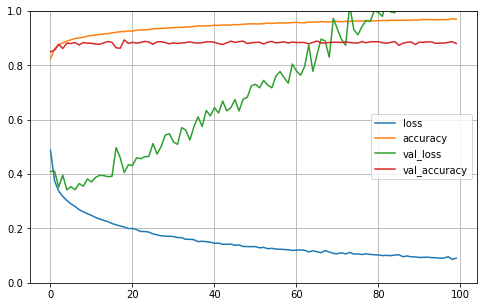

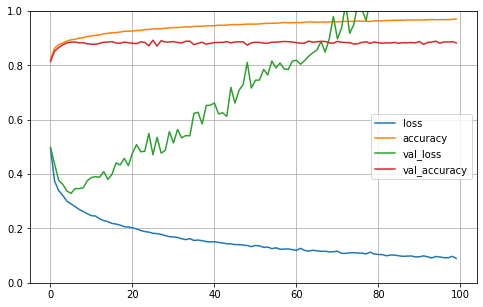

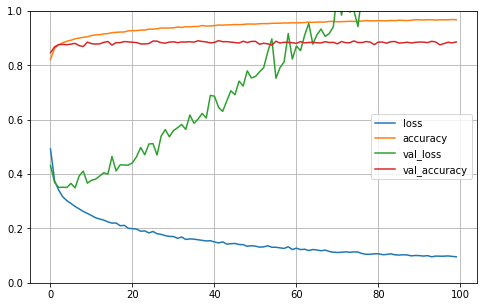

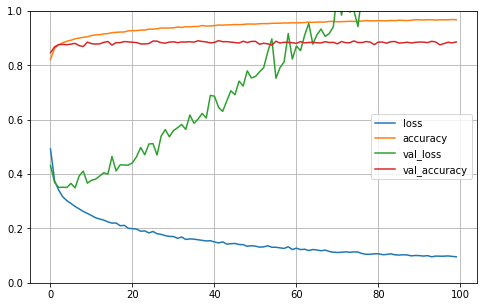

In [98]:
## 4 HL 
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# 3 HL 
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# 2 HL 
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
# 1 HL 
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_87 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
9600/9600 [==============================] - 13s 1ms/step - loss: 0.4978 - accuracy: 0.8195 - val_loss: 0.4513 - val_accuracy: 0.8359
Epoch 2/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.3752 - accuracy: 0.8628 - val_loss: 0.3759 - val_accuracy: 0.8617
Epoch 3/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.3402 

9600/9600 [==============================] - 13s 1ms/step - loss: 0.1378 - accuracy: 0.9515 - val_loss: 0.7068 - val_accuracy: 0.8845
Epoch 52/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1326 - accuracy: 0.9545 - val_loss: 0.7515 - val_accuracy: 0.8878
Epoch 53/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1318 - accuracy: 0.9542 - val_loss: 0.7278 - val_accuracy: 0.8867
Epoch 54/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.1317 - accuracy: 0.9531 - val_loss: 0.8164 - val_accuracy: 0.8844
Epoch 55/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1313 - accuracy: 0.9537 - val_loss: 0.7899 - val_accuracy: 0.8835
Epoch 56/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1257 - accuracy: 0.9561 - val_loss: 0.7666 - val_accuracy: 0.8874
Epoch 57/100
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1278 - accuracy: 0.9560 - val_loss: 0.7873 - val_a

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7304 - accuracy: 0.7690 - val_loss: 0.5421 - val_accuracy: 0.8202
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5101 - accuracy: 0.8279 - val_loss: 0.4914 - val_accuracy: 0.8262
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4650 - accuracy: 0.8405 - val_loss: 0.4607 - val_accuracy: 0.8399
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4395 - accuracy: 0.8496 - val_loss: 0.4410 - val_accuracy: 0.8484
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4202 - accuracy: 0.8568 - val_loss: 0.4220 - val_accuracy: 0.8525
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4069 - accuracy: 0.8600 - val_loss: 0.4277 - val_accuracy: 0.8514
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3933 - accuracy: 0.8651 - val_loss: 0.4052 - val_ac

1500/1500 [==============================] - 2s 1ms/step - loss: 0.2044 - accuracy: 0.9306 - val_loss: 0.3002 - val_accuracy: 0.8936
Epoch 58/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2016 - accuracy: 0.9315 - val_loss: 0.3017 - val_accuracy: 0.8914
Epoch 59/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1995 - accuracy: 0.9316 - val_loss: 0.3013 - val_accuracy: 0.8928
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1975 - accuracy: 0.9323 - val_loss: 0.3076 - val_accuracy: 0.8925
Epoch 61/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1959 - accuracy: 0.9331 - val_loss: 0.2998 - val_accuracy: 0.8941
Epoch 62/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1935 - accuracy: 0.9342 - val_loss: 0.3013 - val_accuracy: 0.8919
Epoch 63/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1921 - accuracy: 0.9348 - val_loss: 0.3081 - val_accuracy

(0.0, 1.0)

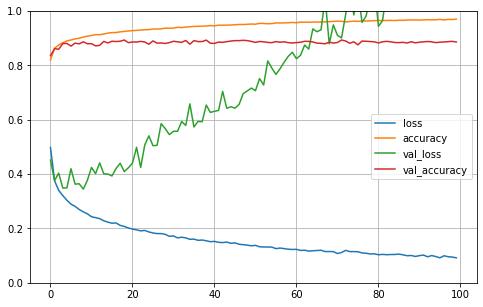

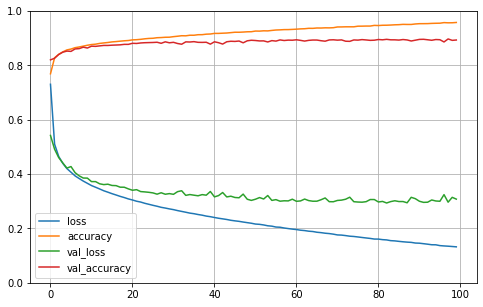

In [102]:
## Now we can change the optimizer to adam and  check the performnace 
##############################################
# Now we can create a model with 1  HL 
# HL1 1000 neurons 
model1 = build_model(n=1,hldim=[1000],hlactfun=['relu'],optmzr='adam')
model1.summary()
history1 = model1.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model1_eval = model1.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model1_eval)
##############################################
# Now we can create a model with 1  HL 
# HL1 1000 neurons 
model2 = build_model(n=1,hldim=[1000],hlactfun=['relu'],optmzr='sgd')
model2.summary()
history2 = model2.fit(X_train_norm,Y_train,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model2_eval = model2.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model2_eval)


## adam
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# sgd
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [103]:
model1 = build_model(n=1,hldim=[1000],hlactfun=['relu'],optmzr='adam')
model1.summary()
history1 = model1.fit(X_train_norm,Y_train,batch_size=5,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model1_eval = model1.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model1_eval)

model2 = build_model(n=1,hldim=[1000],hlactfun=['relu'],optmzr='adam')
model2.summary()
history2 = model2.fit(X_train_norm,Y_train,epochs=100,batch_size=10,validation_split=.2,validation_data=(X_test,Y_test))
model2_eval = model2.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model2_eval)

model3 = build_model(n=1,hldim=[1000],hlactfun=['relu'],optmzr='adam')
model3.summary()
history3 = model3.fit(X_train_norm,Y_train,batch_size=20,epochs=100,validation_split=.2,validation_data=(X_test,Y_test))
model3_eval = model3.evaluate(X_test,Y_test)
print('Model1 Evaluation :' , model3_eval)


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_91 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
9600/9600 [==============================] - 15s 2ms/step - loss: 0.4919 - accuracy: 0.8221 - val_loss: 0.4161 - val_accuracy: 0.8522
Epoch 2/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.3766 - accuracy: 0.8621 - val_loss: 0.3844 - val_accuracy: 0.8639
Epoch 3/100
9600/9600 [==============================] - 17s 2ms/step - loss: 0.3429 

9600/9600 [==============================] - 17s 2ms/step - loss: 0.1335 - accuracy: 0.9532 - val_loss: 0.7583 - val_accuracy: 0.8873
Epoch 52/100
9600/9600 [==============================] - 16s 2ms/step - loss: 0.1326 - accuracy: 0.9531 - val_loss: 0.8655 - val_accuracy: 0.8806
Epoch 53/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1300 - accuracy: 0.9549 - val_loss: 0.8358 - val_accuracy: 0.8868
Epoch 54/100
9600/9600 [==============================] - 19s 2ms/step - loss: 0.1269 - accuracy: 0.9541 - val_loss: 0.8468 - val_accuracy: 0.8851
Epoch 55/100
9600/9600 [==============================] - 16s 2ms/step - loss: 0.1297 - accuracy: 0.9544 - val_loss: 0.8476 - val_accuracy: 0.8867
Epoch 56/100
9600/9600 [==============================] - 14s 1ms/step - loss: 0.1310 - accuracy: 0.9554 - val_loss: 0.8772 - val_accuracy: 0.8858
Epoch 57/100
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1223 - accuracy: 0.9572 - val_loss: 0.9274 - val_a

Epoch 1/100
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4903 - accuracy: 0.8239 - val_loss: 0.4194 - val_accuracy: 0.8495
Epoch 2/100
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3711 - accuracy: 0.8642 - val_loss: 0.3794 - val_accuracy: 0.8641
Epoch 3/100
4800/4800 [==============================] - 5s 1ms/step - loss: 0.3321 - accuracy: 0.8773 - val_loss: 0.3718 - val_accuracy: 0.8680
Epoch 4/100
4800/4800 [==============================] - 5s 1ms/step - loss: 0.3082 - accuracy: 0.8869 - val_loss: 0.3549 - val_accuracy: 0.8754
Epoch 5/100
4800/4800 [==============================] - 7s 1ms/step - loss: 0.2915 - accuracy: 0.8936 - val_loss: 0.3862 - val_accuracy: 0.8653
Epoch 6/100
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2725 - accuracy: 0.8977 - val_loss: 0.3466 - val_accuracy: 0.8802
Epoch 7/100
4800/4800 [==============================] - 5s 1ms/step - loss: 0.2652 - accuracy: 0.9024 - val_loss: 0.3596 - val_ac

4800/4800 [==============================] - 6s 1ms/step - loss: 0.1008 - accuracy: 0.9640 - val_loss: 0.7068 - val_accuracy: 0.8903
Epoch 58/100
4800/4800 [==============================] - 7s 1ms/step - loss: 0.0976 - accuracy: 0.9654 - val_loss: 0.7009 - val_accuracy: 0.8869
Epoch 59/100
4800/4800 [==============================] - 9s 2ms/step - loss: 0.0907 - accuracy: 0.9673 - val_loss: 0.7231 - val_accuracy: 0.8854
Epoch 60/100
4800/4800 [==============================] - 8s 2ms/step - loss: 0.0969 - accuracy: 0.9653 - val_loss: 0.7094 - val_accuracy: 0.8905
Epoch 61/100
4800/4800 [==============================] - 7s 2ms/step - loss: 0.0895 - accuracy: 0.9671 - val_loss: 0.7600 - val_accuracy: 0.8877
Epoch 62/100
4800/4800 [==============================] - 8s 2ms/step - loss: 0.0945 - accuracy: 0.9659 - val_loss: 0.8140 - val_accuracy: 0.8844
Epoch 63/100
4800/4800 [==============================] - 7s 1ms/step - loss: 0.0913 - accuracy: 0.9668 - val_loss: 0.7555 - val_accuracy

2400/2400 [==============================] - 3s 1ms/step - loss: 0.2554 - accuracy: 0.9045 - val_loss: 0.3200 - val_accuracy: 0.8878
Epoch 8/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2457 - accuracy: 0.9075 - val_loss: 0.3166 - val_accuracy: 0.8876
Epoch 9/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2347 - accuracy: 0.9115 - val_loss: 0.3339 - val_accuracy: 0.8877
Epoch 10/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2243 - accuracy: 0.9151 - val_loss: 0.3653 - val_accuracy: 0.8808
Epoch 11/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2151 - accuracy: 0.9182 - val_loss: 0.3331 - val_accuracy: 0.8888
Epoch 12/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2082 - accuracy: 0.9218 - val_loss: 0.3172 - val_accuracy: 0.8960
Epoch 13/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1989 - accuracy: 0.9254 - val_loss: 0.3474 - val_accuracy: 

2400/2400 [==============================] - 3s 1ms/step - loss: 0.0693 - accuracy: 0.9754 - val_loss: 0.7269 - val_accuracy: 0.8916
Epoch 64/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0672 - accuracy: 0.9764 - val_loss: 0.7124 - val_accuracy: 0.8907
Epoch 65/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0703 - accuracy: 0.9747 - val_loss: 0.7261 - val_accuracy: 0.8907
Epoch 66/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0641 - accuracy: 0.9767 - val_loss: 0.7220 - val_accuracy: 0.8889
Epoch 67/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0665 - accuracy: 0.9757 - val_loss: 0.7252 - val_accuracy: 0.8901
Epoch 68/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0671 - accuracy: 0.9762 - val_loss: 0.7003 - val_accuracy: 0.8927
Epoch 69/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0596 - accuracy: 0.9777 - val_loss: 0.7727 - val_accuracy

(0.0, 1.0)

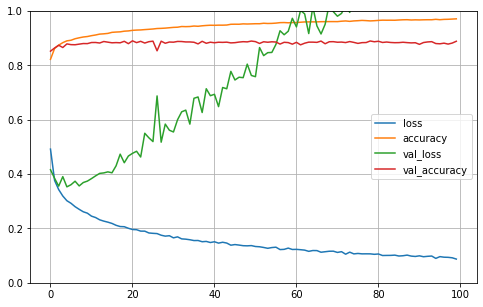

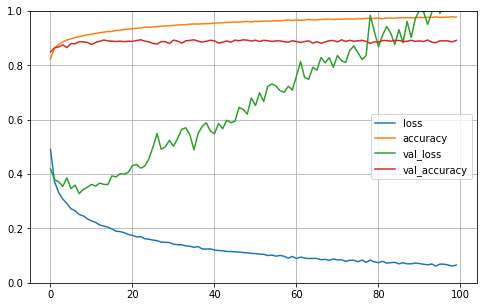

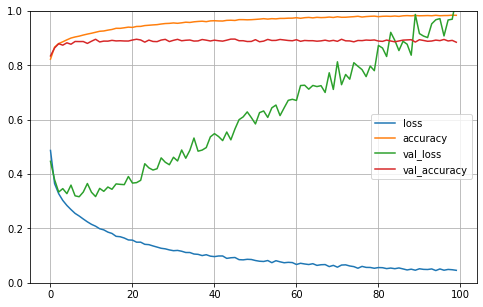

In [104]:
## 5
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# 10
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
# 20
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
